# Olympic Data Analysis

This notebook contains an analysis of Olympic data, including data cleaning, handling missing values, and visualization of the dataset.

## Dataset Content

The dataset contains the following columns:
- **ID**: Unique number for each athlete
- **Name**: Athlete’s name
- **Sex**: M or F
- **Age**: Integer
- **Height**: In centimeters
- **Weight**: In kilograms
- **Team**: Team name
- **NOC**: National Olympic Committee 3-letter code
- **Games**: Year and season
- **Year**: Integer
- **Season**: Summer or Winter
- **City**: Host city
- **Sport**: Sport
- **Event**: Event
- **Medal**: Gold, Silver, Bronze, or NA

## Import Libraries

We start by importing the necessary libraries for data analysis and visualization.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Data Representation

In [ ]:
df = pd.read_csv("dataset_olympics.csv")

In [3]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN
69999,35658,Marek Fiurek,M,23.0,180.0,68.0,Czech Republic,CZE,1998 Winter,1998,Winter,Nagano,Nordic Combined,Nordic Combined Men's Team,NaN


In [5]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
45830,23652,Charlotte Rose Craig,F,17.0,168.0,49.0,United States,USA,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Women's Flyweight,NaN
14828,8005,Bengt Baron,M,18.0,193.0,83.0,Sweden,SWE,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,Gold
63055,32323,William Ellicott,M,NaN,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Running Target, Double Shot",NaN
50709,26078,Francesco De Fabiani,M,20.0,183.0,71.0,Italy,ITA,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 30 km Skiathlon,NaN
14013,7574,Andriana Veselinova Banova,F,25.0,178.0,64.0,Bulgaria,BUL,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Triple Jump,NaN


In [6]:
df.nunique()

ID        35658
Name      35556
Sex           2
Age          68
Height       87
Weight      173
Team        827
NOC         226
Games        51
Year         35
Season        2
City         42
Sport        65
Event       744
Medal         3
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [8]:
df.shape

(70000, 15)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,70000.0,18081.846986,10235.613253,1.0,9325.75,18032.0,26978.0,35658.0
Age,67268.0,25.644645,6.485239,11.0,21.00,25.0,28.0,88.0
Height,53746.0,175.505303,10.384203,127.0,168.00,175.0,183.0,223.0
Weight,52899.0,70.900216,14.217489,25.0,61.00,70.0,79.0,214.0
Year,70000.0,1977.766457,30.103306,1896.0,1960.00,1984.0,2002.0,2016.0


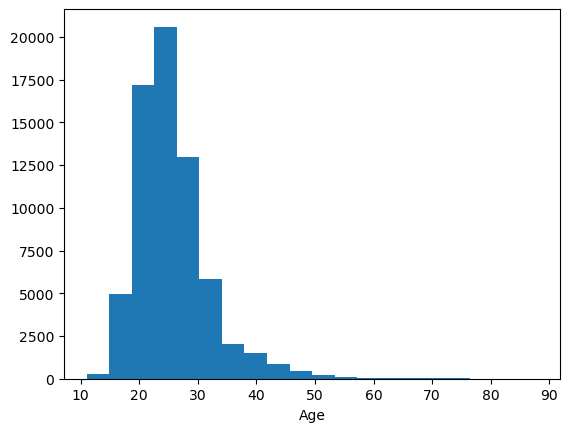

In [10]:
plt.hist(df['Age'], bins=20)
plt.xlabel("Age")
plt.show()

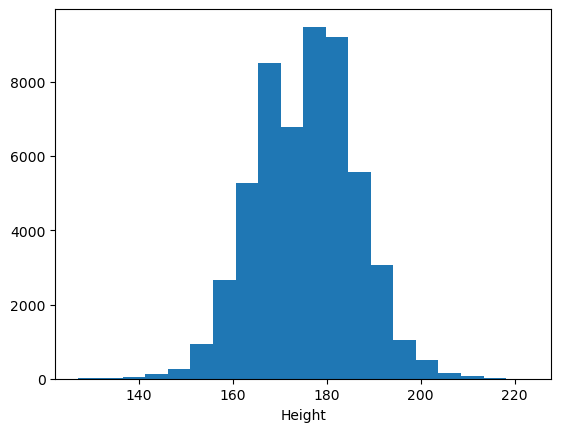

In [11]:
plt.hist(df['Height'], bins=20)
plt.xlabel("Height")
plt.show()

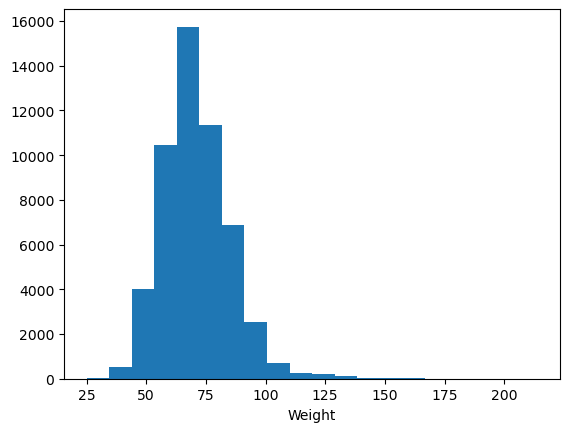

In [12]:
plt.hist(df['Weight'], bins=20)
plt.xlabel("Weight")
plt.show()

## Missing Values

In [13]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype('int32')

In [15]:
df['Height'].fillna(df['Height'].mean, inplace=True)

In [16]:
df['Weight'].fillna(df['Weight'].mean, inplace=True)

In [17]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

## Duplicates

In [18]:
df.duplicated().sum()

383

### drop duplicates

In [19]:
df.shape

(70000, 15)

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(69617, 15)

In [22]:
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69617 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      69617 non-null  int64 
 1   Name    69617 non-null  object
 2   Sex     69617 non-null  object
 3   Age     69617 non-null  int32 
 4   Height  69617 non-null  object
 5   Weight  69617 non-null  object
 6   Team    69617 non-null  object
 7   NOC     69617 non-null  object
 8   Games   69617 non-null  object
 9   Year    69617 non-null  int64 
 10  Season  69617 non-null  object
 11  City    69617 non-null  object
 12  Sport   69617 non-null  object
 13  Event   69617 non-null  object
 14  Medal   9686 non-null   object
dtypes: int32(1), int64(2), object(12)
memory usage: 8.2+ MB


## Outliers

### Outliers Age

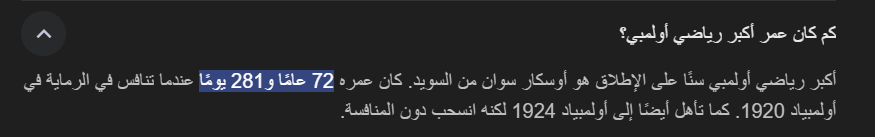

In [24]:
print(df['Age'].dtype)


int32


In [25]:
over_Age = df[(df['Age'] > 73)].index

In [26]:
over_Age

Index([7433, 9371, 19308, 54531, 56599, 60861, 62839], dtype='int64')

In [27]:
df.drop(over_Age, inplace= True)

In [28]:
df.shape

(69610, 15)

### Outliers Weight

In [29]:
type(df['Weight'])

pandas.core.series.Series

In [30]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

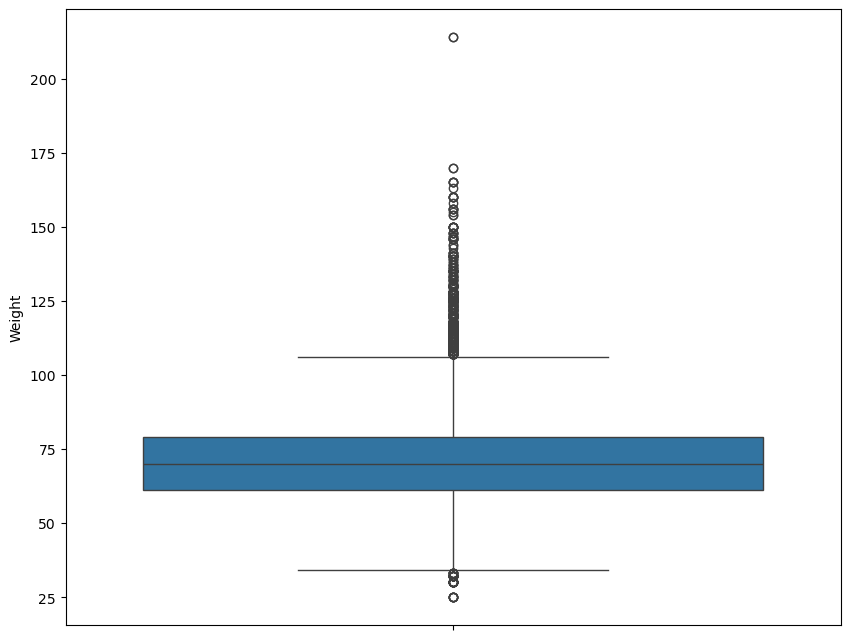

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(df['Weight'])
plt.show()

In [32]:
df.Weight.min()

25.0

In [33]:
df.Weight.max()

214.0

In [34]:
df.Weight.describe()

count    52899.000000
mean        70.900216
std         14.217489
min         25.000000
25%         61.000000
50%         70.000000
75%         79.000000
max        214.000000
Name: Weight, dtype: float64

### STD

In [35]:
Outliers_upper_bound = df.Weight.mean() + (3 * df.Weight.std() )
Outliers_upper_bound

113.5526828850834

In [36]:
Outliers_lower_bound = df.Weight.mean() - (3 * df.Weight.std() )
Outliers_lower_bound

28.24774812495461

In [37]:
df[df.Weight > Outliers_upper_bound ]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57,18,Timo Antero Aaltonen,M,31,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN
80,22,Andreea Aanei,F,22,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
384,212,Yasser Abdel Rahman Sakr,M,30,180.0,120.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN
507,282,Hadi Abdul Jabbar,M,30,180.0,117.5,Iraq,IRQ,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Heavyweight,NaN
508,282,Hadi Abdul Jabbar,M,34,180.0,117.5,Iraq,IRQ,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68814,35105,"Allan Dean ""Al"" Feuerbach",M,24,186.0,120.0,United States,USA,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's Shot Put,NaN
68815,35105,"Allan Dean ""Al"" Feuerbach",M,28,186.0,120.0,United States,USA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Shot Put,NaN
68871,35126,Nazario Fiakaifonu,M,24,189.0,123.0,Vanuatu,VAN,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN
69148,35262,Pablo Figueroa Carillo,M,26,186.0,128.0,Puerto Rico,PUR,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN


In [38]:
df[df.Weight < Outliers_lower_bound ]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40849,21049,Choi Myong-Hui,F,14,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
40850,21049,Choi Myong-Hui,F,14,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
40851,21049,Choi Myong-Hui,F,14,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
40852,21049,Choi Myong-Hui,F,14,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
40853,21049,Choi Myong-Hui,F,14,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
40854,21049,Choi Myong-Hui,F,14,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN


In [39]:
outliers = df[(df.Weight > Outliers_upper_bound ) | (df.Weight < Outliers_lower_bound)]
outliers

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57,18,Timo Antero Aaltonen,M,31,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN
80,22,Andreea Aanei,F,22,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
384,212,Yasser Abdel Rahman Sakr,M,30,180.0,120.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN
507,282,Hadi Abdul Jabbar,M,30,180.0,117.5,Iraq,IRQ,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Heavyweight,NaN
508,282,Hadi Abdul Jabbar,M,34,180.0,117.5,Iraq,IRQ,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68814,35105,"Allan Dean ""Al"" Feuerbach",M,24,186.0,120.0,United States,USA,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's Shot Put,NaN
68815,35105,"Allan Dean ""Al"" Feuerbach",M,28,186.0,120.0,United States,USA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Shot Put,NaN
68871,35126,Nazario Fiakaifonu,M,24,189.0,123.0,Vanuatu,VAN,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN
69148,35262,Pablo Figueroa Carillo,M,26,186.0,128.0,Puerto Rico,PUR,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN


### delete outliers Weight

In [40]:
df.shape

(69610, 15)

In [41]:
df.drop(outliers.index , inplace= True)

In [42]:
df.shape

(69029, 15)

### Outliers Height

In [43]:
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

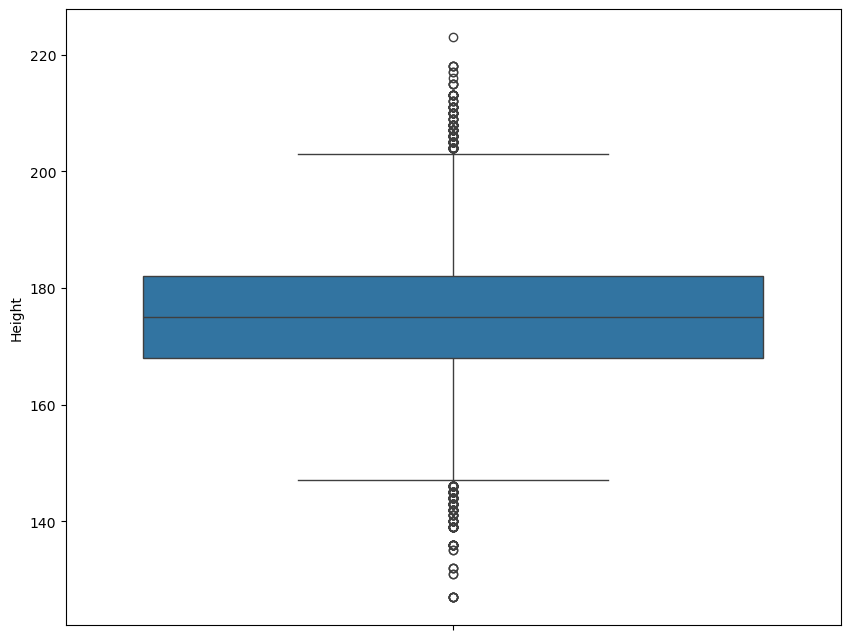

In [44]:
plt.figure(figsize=(10, 8))
sns.boxplot(df['Height'])
plt.show()

In [45]:
Outliers_upper_bound = df.Height.mean() + (3 * df.Height.std() )
Outliers_upper_bound

206.1352219502911

In [46]:
Outliers_lower_bound = df.Height.mean() - (3 * df.Height.std() )
Outliers_lower_bound

144.5551557204883

In [47]:
outliers = df[(df.Height > Outliers_upper_bound ) | (df.Height < Outliers_lower_bound)]
outliers

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
443,246,Mamdouh Abdelrehim,M,26,207.0,90.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
820,468,Abdelhalim Muhammad Abou,M,27,210.0,88.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
1186,664,Kieron Robert Achara,M,29,208.0,110.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,NaN
1322,742,Roberto Acua,M,25,208.0,109.0,Argentina,ARG,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN
1622,901,Amos Ojo Adekunle,M,26,140.0,48.0,Nigeria,NGR,1988 Summer,1988,Summer,Seoul,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69222,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69223,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
69224,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
69225,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze


### delete outliers Height

In [48]:
df.shape

(69029, 15)

In [49]:
df.drop(outliers.index , inplace= True)

In [50]:
df.shape

(68813, 15)

## Exploratory Data Analysis (EDA)

In [51]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


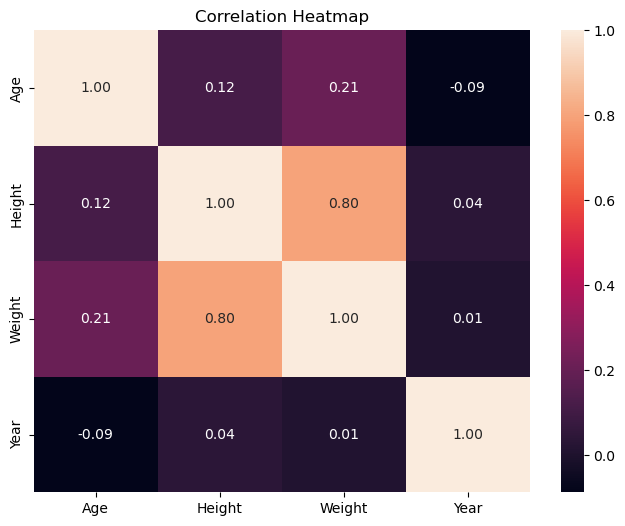

In [52]:
numerical_df = df[['Age', 'Height', 'Weight', 'Year']]
corr = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [53]:
df.ID.nunique()

35230

In [54]:
df.Sport.nunique()

65

In [55]:
df["Event"].nunique()

744

In [56]:
df['Sex'].value_counts()

Sex
M    50879
F    17934
Name: count, dtype: int64

In [57]:
df['Age'].mean()

25.519204220132824

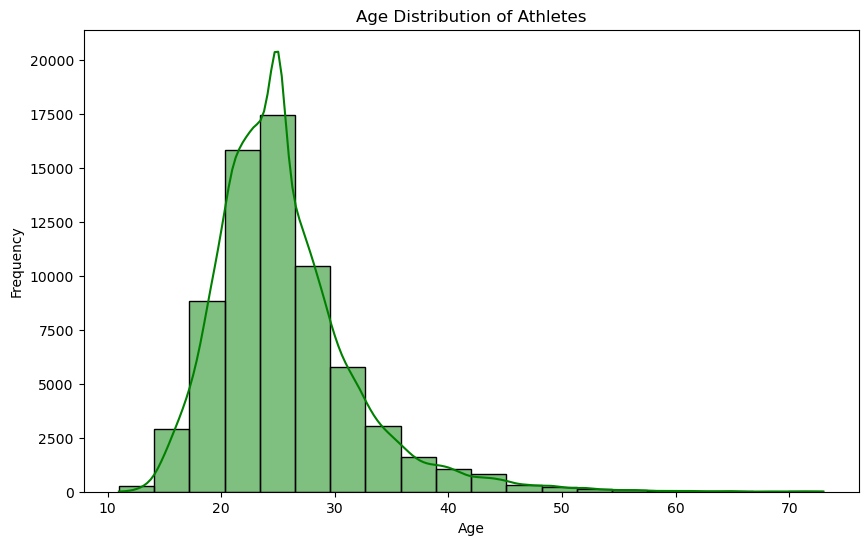

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='g')
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [59]:
df['Weight'].describe()

count    52110.000000
mean        70.330608
std         12.898536
min         30.000000
25%         61.000000
50%         70.000000
75%         79.000000
max        113.000000
Name: Weight, dtype: float64

In [60]:
df['Height'].describe()

count    52952.000000
mean       175.373659
std         10.033161
min        145.000000
25%        168.000000
50%        175.000000
75%        182.000000
max        206.000000
Name: Height, dtype: float64

In [61]:
df['NOC'].nunique()

226

In [62]:
df["Medal"].notna().sum()
# or
# df['Medal'].value_counts().sum()

9535

In [63]:
df['Medal'].value_counts()

Medal
Gold      3232
Bronze    3159
Silver    3144
Name: count, dtype: int64

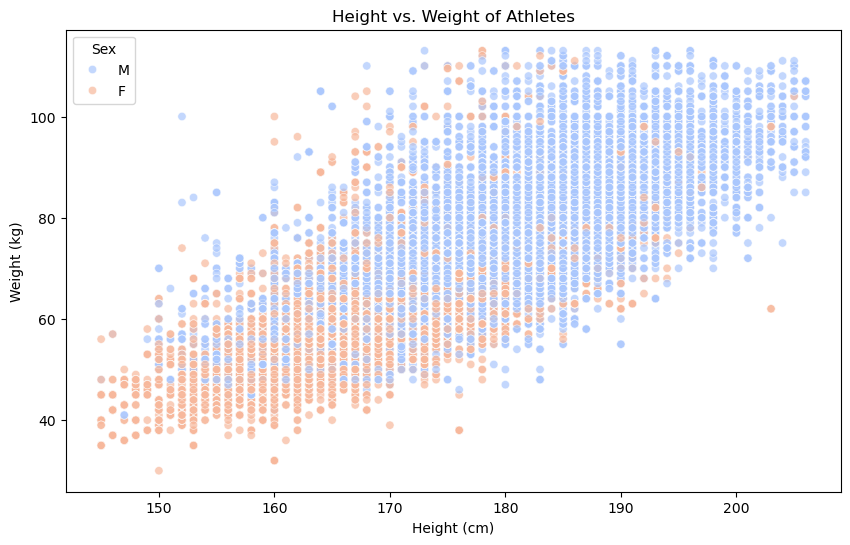

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=df, hue='Sex', palette='coolwarm', alpha=0.7)
plt.title('Height vs. Weight of Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [65]:
df[df["Medal"].notna()]["ID"].nunique()

6879

In [66]:
medal_df = df[df["Medal"].notna()]
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69957,35636,"Joseph Francis ""Joe"" Fitzgerald",M,27,NaN,81.0,United States,USA,1932 Winter,1932,Winter,Lake Placid,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
69974,35644,Benita P. Fitzgerald-Brown (-Mosley),F,23,178.0,65.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 100 metres Hurdles,Gold
69977,35647,"James Paul ""Jim"" Fitzpatrick",M,27,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Rugby,Rugby Men's Rugby,Gold
69983,35651,Theresa Matauaina Fitzpatrick,F,21,168.0,75.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Silver


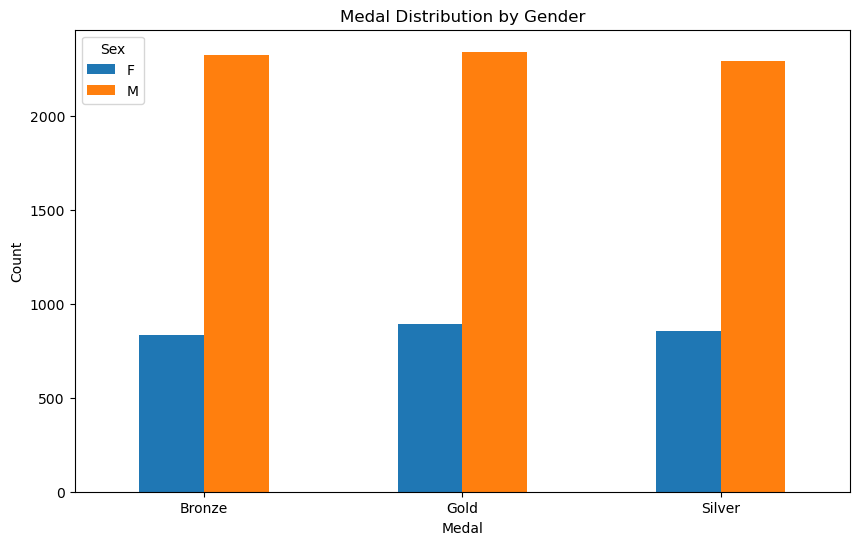

In [67]:
medal_counts = medal_df.groupby(['Medal', 'Sex']).size().unstack()
medal_counts.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Medal Distribution by Gender')
plt.xlabel('Medal')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [68]:
medal_df['Name'].value_counts().nlargest(1)

Name
Nikolay Yefimovich Andrianov    15
Name: count, dtype: int64

In [69]:
medal_df[medal_df['Medal'] == 'Gold']['Name'].value_counts().nlargest(1)

Name
Raymond Clarence "Ray" Ewry    10
Name: count, dtype: int64

In [70]:
medal_df['NOC'].value_counts().nlargest(1)

NOC
USA    1519
Name: count, dtype: int64

In [71]:
medal_df[medal_df['Medal'] == 'Gold']['NOC'].value_counts().nlargest(1)

NOC
USA    723
Name: count, dtype: int64

In [72]:
medal_df[medal_df['Medal'] == 'Gold']['Event'].value_counts().nlargest(1)

Event
Football Men's Football    113
Name: count, dtype: int64

In [73]:
medal_df[medal_df['Medal'] == 'Silver']['NOC'].value_counts().nlargest(1)

NOC
USA    438
Name: count, dtype: int64

In [74]:
medal_df[medal_df['Medal'] == 'Bronze']['NOC'].value_counts().nlargest(1)

NOC
USA    358
Name: count, dtype: int64

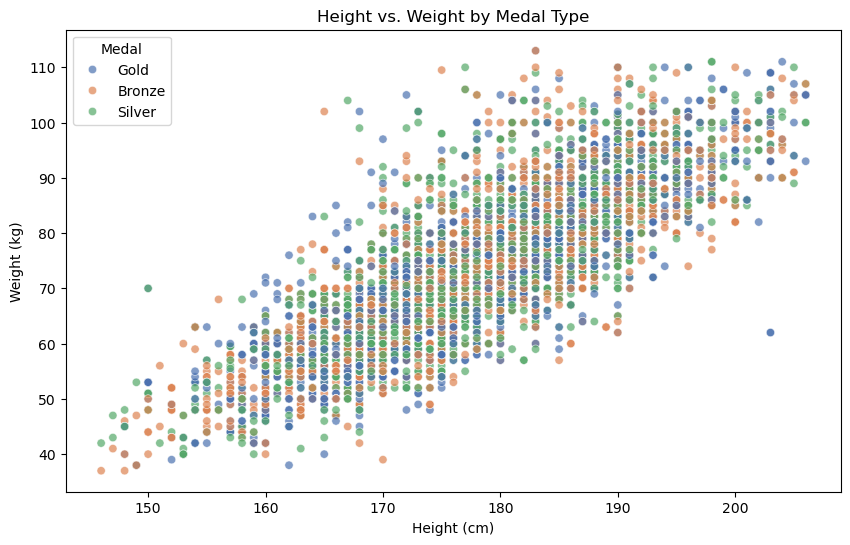

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=medal_df, hue='Medal', palette='deep', alpha=0.7)
plt.title('Height vs. Weight by Medal Type')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [76]:
medal_df['NOC'].nunique()

119

In [77]:
medal_df['Sport'].value_counts().nlargest(1)

Sport
Athletics    1019
Name: count, dtype: int64

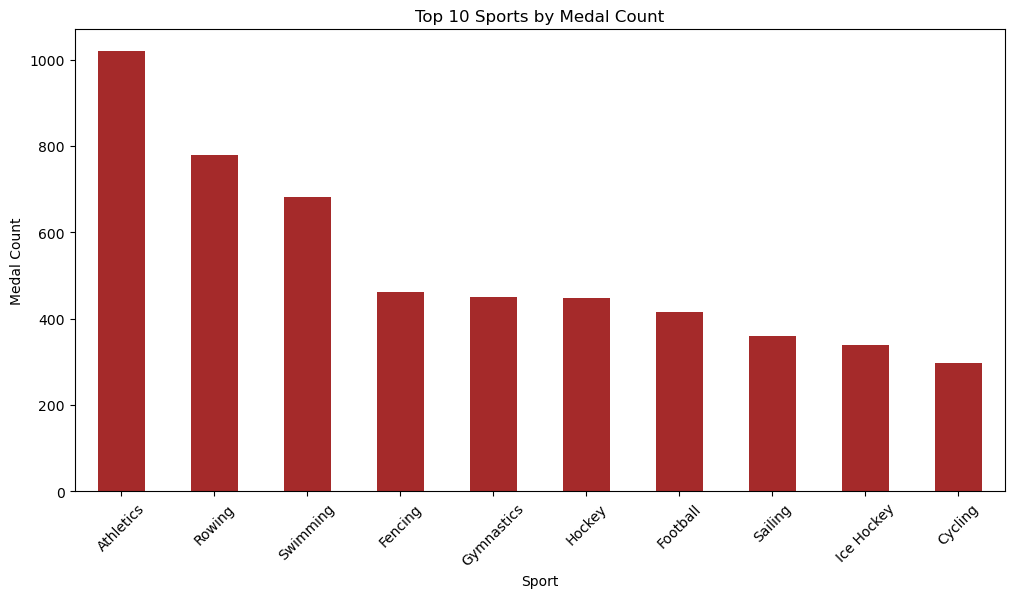

In [78]:
medal_by_sport = medal_df['Sport'].value_counts().head(10)

plt.figure(figsize=(12, 6))
medal_by_sport.plot(kind='bar', color= 'brown')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Medal Count')
plt.xticks(rotation=45)
plt.show()


In [79]:
medal_df['Event'].value_counts().nlargest(1)

Event
Football Men's Football    352
Name: count, dtype: int64

In [80]:
medal_df['Team'].value_counts().nlargest(1)

Team
United States    1418
Name: count, dtype: int64

In [81]:
medal_df['Sport'].value_counts().nlargest(1)

Sport
Athletics    1019
Name: count, dtype: int64

In [82]:
medal_df['Event'].value_counts().nlargest(1)

Event
Football Men's Football    352
Name: count, dtype: int64

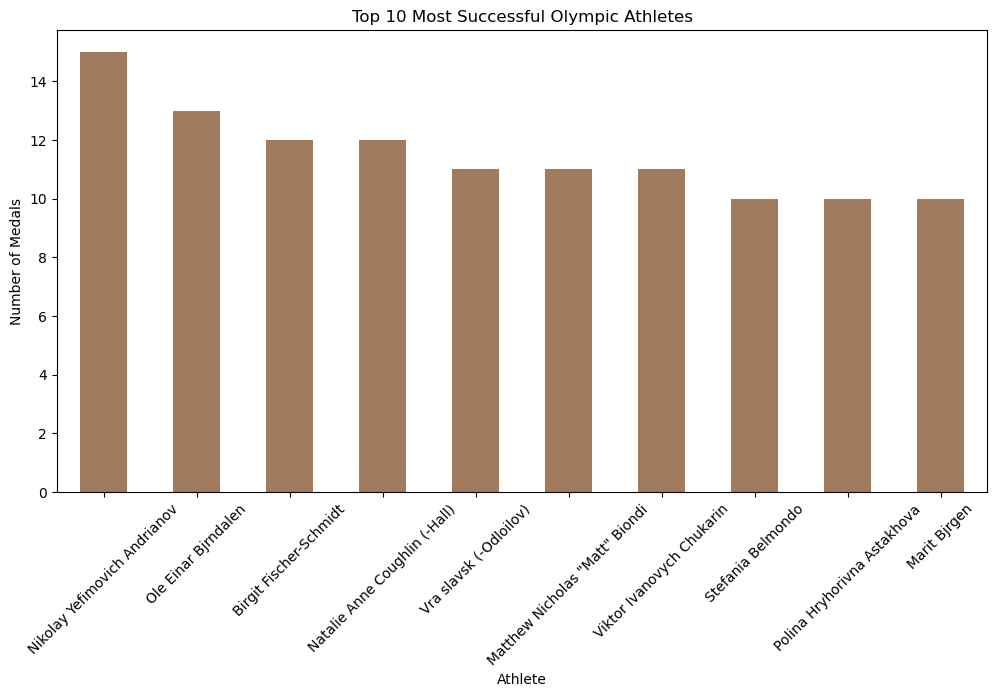

In [83]:
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_athletes.plot(kind='bar', color='#A27B5C')
plt.title('Top 10 Most Successful Olympic Athletes')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()


In [84]:
medal_df['Age'].mean()

26.039853172522285

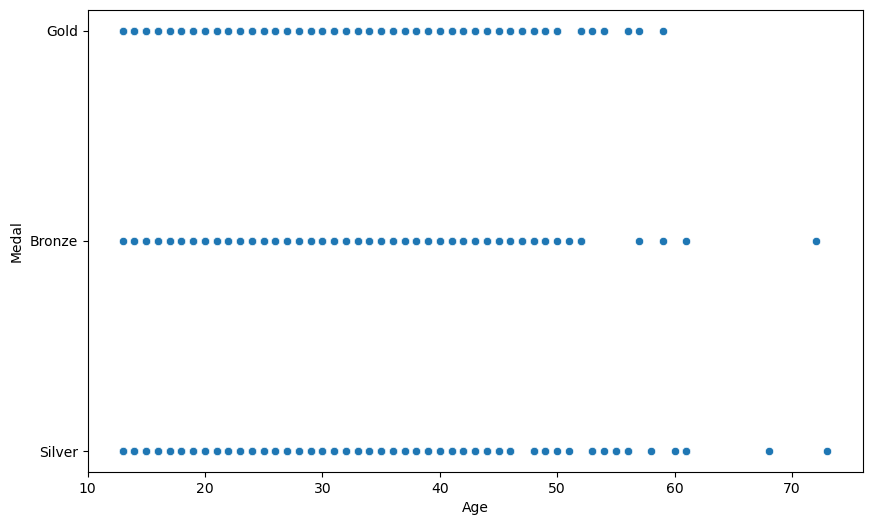

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Medal', data=df)
plt.show()

In [86]:
medal_df['Weight'].mean()

73.09133200417735

In [87]:
medal_df['Height'].mean()

177.56790807143847

In [88]:
df.groupby("NOC")["Games"].nunique()

NOC
AFG    13
AHO    13
ALB     6
ALG    13
AND    15
       ..
YEM     7
YMD     1
YUG    28
ZAM    12
ZIM    13
Name: Games, Length: 226, dtype: int64

In [89]:
df["NOC"].value_counts().nlargest(1)

NOC
USA    5055
Name: count, dtype: int64

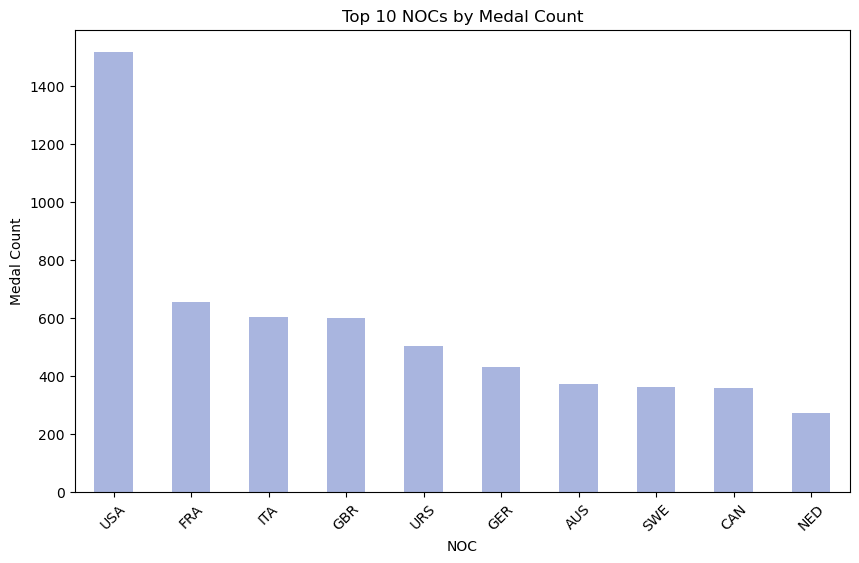

In [90]:
medal_by_noc = medal_df['NOC'].value_counts().head(10)

plt.figure(figsize=(10, 6))
medal_by_noc.plot(kind='bar', color='#A9B5DF') 
plt.title('Top 10 NOCs by Medal Count')
plt.xlabel('NOC')
plt.ylabel('Medal Count')
plt.xticks(rotation=45)
plt.show()


In [91]:
df.groupby("Year")["NOC"].nunique()

Year
1896      7
1900     20
1904     10
1906     19
1908     18
1912     24
1920     26
1924     40
1928     43
1932     39
1936     49
1948     54
1952     62
1956     69
1960     80
1964     85
1968     99
1972    109
1976     85
1980     83
1984    141
1988    153
1992    152
1994     49
1996    178
1998     57
2000    173
2002     62
2004    173
2006     60
2008    175
2010     53
2012    180
2014     62
2016    177
Name: NOC, dtype: int64

In [92]:
df.groupby(["Year", "NOC"])["Medal"].nunique()

Year  NOC
1896  FRA    1
      GBR    3
      GER    1
      GRE    3
      HUN    1
            ..
2016  VIE    0
      VIN    0
      YEM    0
      ZAM    0
      ZIM    0
Name: Medal, Length: 2866, dtype: int64

In [93]:
df.groupby("Year")["Event"].nunique()

Year
1896     35
1900     80
1904     84
1906     71
1908    108
1912    106
1920    149
1924    148
1928    133
1932    133
1936    163
1948    173
1952    170
1956    172
1960    176
1964    193
1968    204
1972    225
1976    233
1980    239
1984    259
1988    281
1992    312
1994     61
1996    268
1998     68
2000    295
2002     78
2004    296
2006     84
2008    299
2010     86
2012    298
2014     98
2016    302
Name: Event, dtype: int64

In [94]:
df['Sport'].value_counts().nlargest(1)

Sport
Athletics    10407
Name: count, dtype: int64

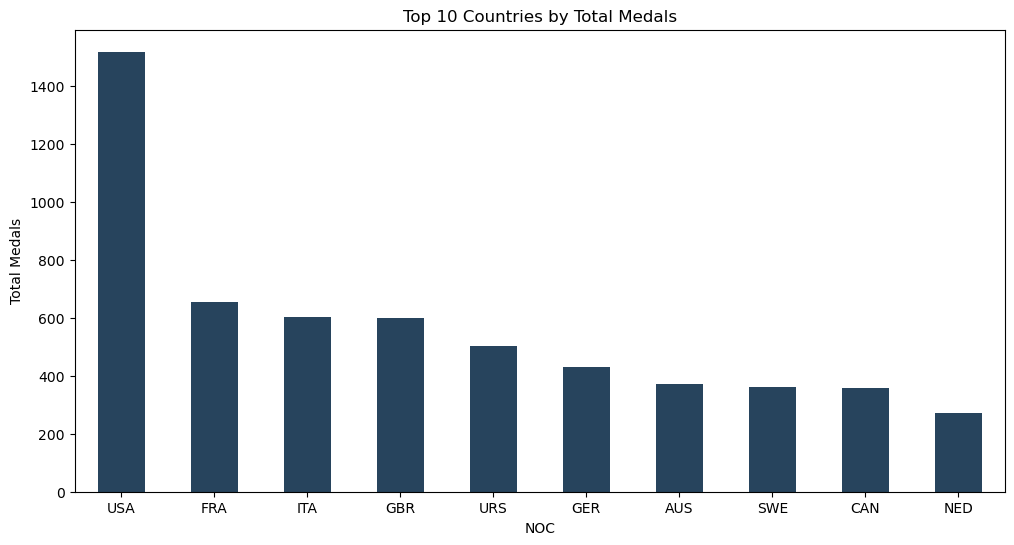

In [95]:
medal_by_noc = df[df['Medal'].notna()].groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
medal_by_noc.plot(kind='bar', color='#27445D')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('NOC')
plt.ylabel('Total Medals')
plt.xticks(rotation=0)
plt.show()


In [96]:
df.groupby('Sport')['Age'].mean()

Sport
Alpine Skiing       23.116079
Alpinism            38.428571
Archery             28.676626
Art Competitions    41.274744
Athletics           24.981647
                      ...    
Tug-Of-War          30.054054
Volleyball          25.287001
Water Polo          25.736016
Weightlifting       25.493697
Wrestling           25.739257
Name: Age, Length: 65, dtype: float64

In [97]:
df.groupby('Year')['ID'].nunique()

Year
1896      34
1900     433
1904     167
1906     203
1908     578
1912     608
1920     796
1924    1059
1928     990
1932     588
1936    1323
1948    1452
1952    1512
1956    1065
1960    1626
1964    1542
1968    1742
1972    2080
1976    1811
1980    1617
1984    2209
1988    2581
1992    2842
1994     420
1996    2625
1998     510
2000    2728
2002     536
2004    2649
2006     562
2008    2726
2010     520
2012    2696
2014     603
2016    2929
Name: ID, dtype: int64

In [98]:
df.groupby('Year')['ID'].nunique().nlargest(1)

Year
2016    2929
Name: ID, dtype: int64

In [99]:
df['City'].value_counts()

City
London                    5918
Athina                    3850
Rio de Janeiro            3595
Sydney                    3443
Atlanta                   3426
Beijing                   3412
Barcelona                 3280
Los Angeles               3267
Seoul                     3167
Munich                    2622
Montreal                  2294
Mexico City               2290
Roma                      2226
Helsinki                  2128
Paris                     2041
Tokyo                     1918
Moskva                    1892
Berlin                    1524
Antwerpen                 1217
Amsterdam                 1212
Melbourne                 1141
Sochi                     1120
Stockholm                 1116
Torino                    1011
Salt Lake City             928
Vancouver                  901
Nagano                     855
Albertville                846
Innsbruck                  837
Lillehammer                761
Calgary                    654
Lake Placid                532
Sar

In [100]:
df['City'].value_counts().idxmax()

'London'

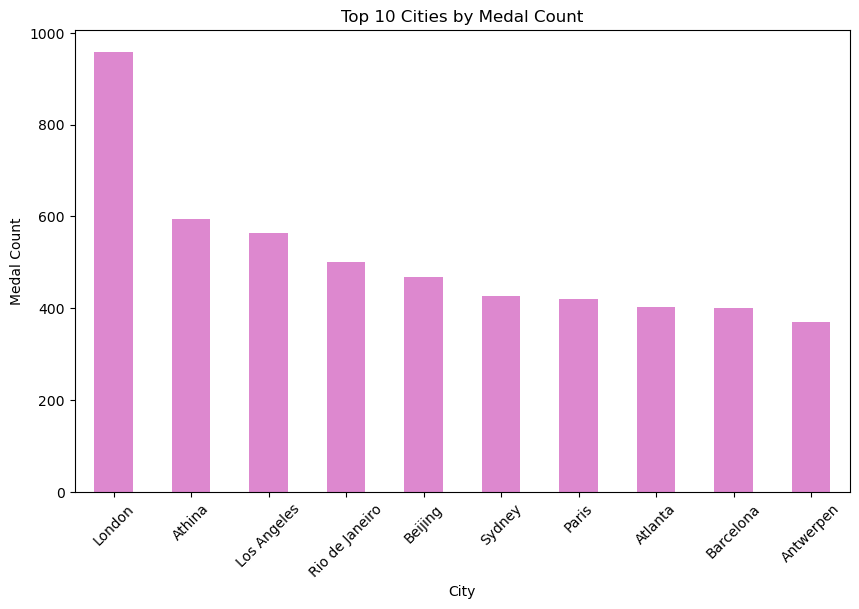

In [101]:
medal_by_city = medal_df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
medal_by_city.plot(kind='bar', color='#DD88CF')  # Single color for simplicity
plt.title('Top 10 Cities by Medal Count')
plt.xlabel('City')
plt.ylabel('Medal Count')
plt.xticks(rotation=45)
plt.show()


In [102]:
df['Season'].value_counts()

Season
Summer    57287
Winter    11526
Name: count, dtype: int64

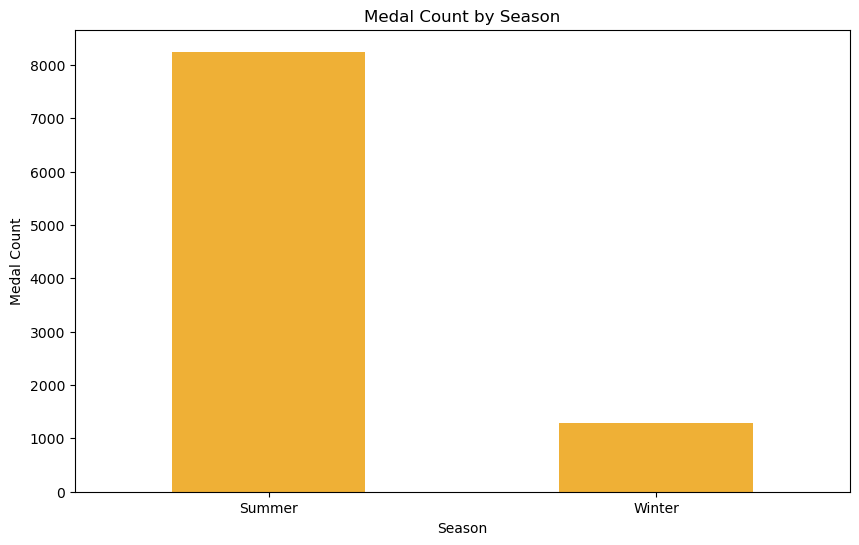

In [103]:
medal_by_season = medal_df['Season'].value_counts()

plt.figure(figsize=(10, 6))
medal_by_season.plot(kind='bar', color='#EFB036')  # Single color for simplicity
plt.title('Medal Count by Season')
plt.xlabel('Season')
plt.ylabel('Medal Count')
plt.xticks(rotation=0)
plt.show()


In [104]:
df[df['Medal'].notna()]['Year'].value_counts().nlargest(1)

Year
2016    501
Name: count, dtype: int64

In [105]:
df[df['Medal'].notna()]['Year'].value_counts().nsmallest(1)

Year
1896    25
Name: count, dtype: int64

In [106]:
df.groupby('Sex')['Age'].mean()

Sex
F    23.775733
M    26.133749
Name: Age, dtype: float64

In [107]:
df.groupby('Sex')['Height'].mean()

Sex
F    168.120817
M    178.560714
Name: Height, dtype: float64

In [108]:
df.groupby('Sex')['Weight'].mean()

Sex
F    60.071473
M    74.884539
Name: Weight, dtype: float64

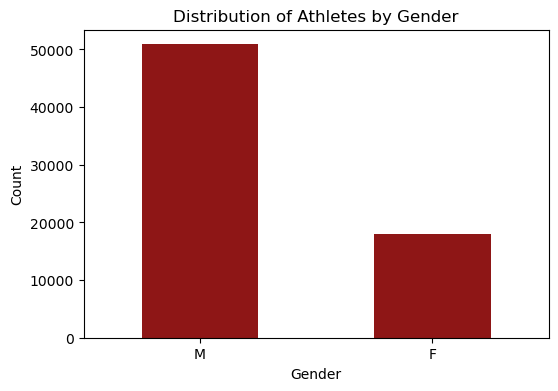

In [109]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='#8E1616')
plt.title('Distribution of Athletes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [110]:
df.groupby('Sport')['Height'].mean().idxmax()

'Basketball'

In [111]:
df.groupby('Sport')['Weight'].mean().idxmax()

'Tug-Of-War'

In [112]:
df.groupby('Sport')['Age'].mean().idxmin()

'Rhythmic Gymnastics'

In [113]:
df.groupby('Sport')['Age'].mean().idxmax()

'Art Competitions'

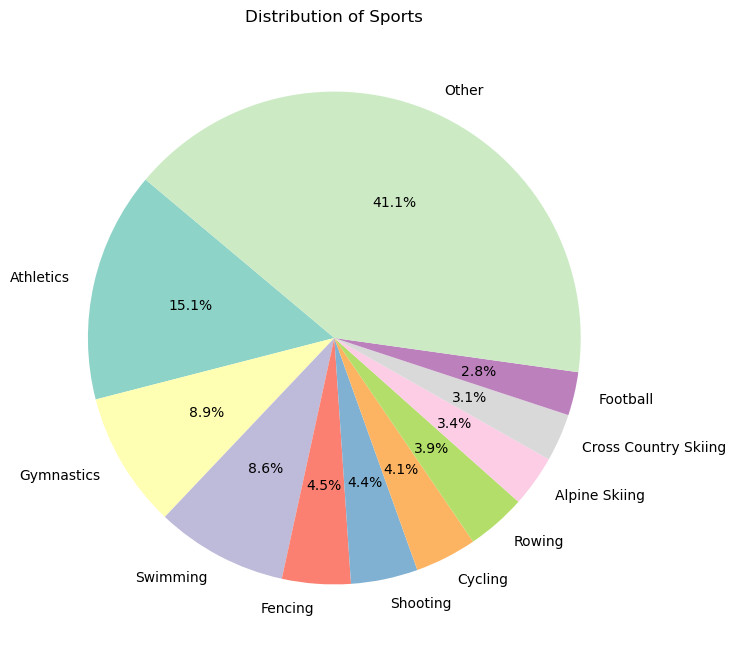

In [114]:
Sport_pie = df['Sport'].value_counts().nlargest(10)
other_sum = df['Sport'].value_counts().iloc[10:].sum()
Sport_pie.loc['Other'] = other_sum  

colors = plt.cm.Set3.colors  

plt.figure(figsize=(12, 8))
plt.pie(Sport_pie, labels=Sport_pie.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Sports')
plt.show()

In [115]:
df['Age'].value_counts().head(7)

Age
25    7700
23    5548
24    5398
22    5231
21    5035
26    4354
27    4038
Name: count, dtype: int64

In [116]:
df['Sex'].value_counts()

Sex
M    50879
F    17934
Name: count, dtype: int64

In [117]:
df['Height'].value_counts().head(10)

Height
180.0    3299
170.0    3264
175.0    2841
178.0    2697
183.0    2208
172.0    2111
173.0    2069
168.0    1966
185.0    1769
165.0    1734
Name: count, dtype: int64

In [118]:
pd.crosstab(df.Season , df.Medal)

Medal,Bronze,Gold,Silver
Season,,,
Summer,2748,2798,2703
Winter,411,434,441


<Figure size 800x500 with 0 Axes>

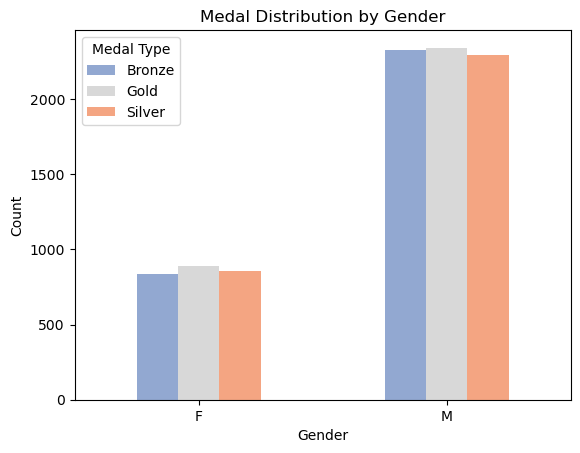

In [119]:
medal_gender_counts = df.groupby(['Sex', 'Medal']).size().unstack()

plt.figure(figsize=(8, 5))
medal_gender_counts.plot(kind='bar', stacked=False, color=['#92a8d1', '#d8d8d8', '#f4a582'])
plt.title('Medal Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Medal Type')
plt.xticks(rotation=0)
plt.show()


<Figure size 800x500 with 0 Axes>

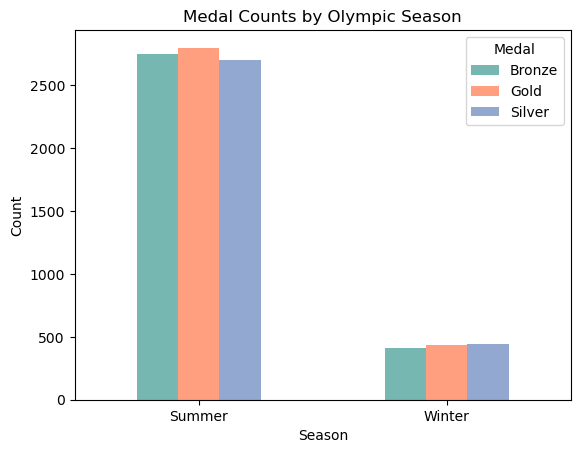

In [120]:
medal_season_counts = df.groupby(['Season', 'Medal']).size().unstack()

plt.figure(figsize=(8, 5))
medal_season_counts.plot(kind='bar', stacked=False, color=['#76b7b2', '#ff9f80', '#92a8d1'])
plt.title('Medal Counts by Olympic Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Medal')
plt.xticks(rotation=0) 
plt.show()
